# Analysis on Previous Application Data
<b>Instruction - 'previous_application.csv' file used in this assignment should be placed in the same folder from where this jupyter notebook will be run.

In [139]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [140]:
#Importing NEcessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
#reading files related to previous application
preapp=pd.read_csv("previous_application.csv")

In [142]:
#helper function to find the missing value percentage in a given dataframe
def missingvalues(df):
    missdf=pd.DataFrame()
    missdf["Missing Percentage"]=100*df.loc[:,:].isnull().sum()/len(df.index)
    return missdf
#Function to plot a countplot/frequency plot of a categorical variable
def unicountplot(df,rot=0):
    plt.figure(figsize=(10,5))#Setting figure Size
    ax=sns.countplot(df)#Potting countplot using seaborn
    total=len(df.index)#finding number of rows to calculate percentages
    #For loop to annotate the countplot
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,str(round(100*height/total,2))+"%", ha="center") 
    #rot is aflag variable when it is 1 it means we want to rotate labels on x axis
    if rot==1:
        plt.xticks(rotation=45,horizontalalignment="right")
    plt.show()
#Function to plot box plot.The function plots two boxplots.First one on a normal scale and second one on a log scale
def uniboxplot(df):
    plt.figure(figsize=(15,5))
    #Plotting subplot 1
    plt.subplot(1,2,1)
    #Plotting Boxplot
    sns.boxplot(y=df)
    #Setting X label
    plt.xlabel(list(df.columns)[0])
    #Adjusting x label rotation and alignment
    plt.xticks(rotation=45,horizontalalignment="right")
    #plotting subplot2
    plt.subplot(1,2,2)
    #Setting X label
    plt.xlabel(list(df.columns)[0])
    #Setting title for the chart
    plt.title("Log Scale Representation")
    #plotting boxplot
    sns.boxplot(y=df)
    #Setting y scale to log
    plt.yscale("log")
    plt.xticks(rotation=45,horizontalalignment="right")
    plt.show()
#Function to plot a distribution plot of a given variable
def distrib(df):
    plt.figure(figsize=(15,5))
    sns.distplot(df.dropna())
    total=len(df.index)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,str(round(100*height/total,2))+"%", ha="center") 
    plt.xlabel(list(df.columns)[0])
    plt.ylabel("Frequency Count")
    plt.title("Log Scale representation of "+ str(list(df.columns)[0]))
    plt.yscale("log")

In [143]:
#Function divides the data frame according to 4 values approved,refused,canceled,unused
#Then it plots each of those dataframe values for the given column
def catanalysis(df,col,rot=0):
    plt.figure(figsize=(15,10))
    orig=df[col].value_counts()
    #Calculating Percentages
    approved=100*df.loc[df.NAME_CONTRACT_STATUS=='Approved',col].value_counts()/orig
    refused=100*df.loc[df.NAME_CONTRACT_STATUS=='Refused',col].value_counts()/orig
    canceled=100*df.loc[df.NAME_CONTRACT_STATUS=='Canceled',col].value_counts()/orig
    unused=100*df.loc[df.NAME_CONTRACT_STATUS=='Unused offer',col].value_counts()/orig
    #Plotting for approved loan values
    plt.subplot(221)
    #Setting title
    plt.title("Percentage plot for Approved")
    ax=sns.barplot(x=list(approved.keys()),y=list(approved.values))
    #Annotating bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height,str(round(height,2))+"%", ha="center")
    #Setting x and y label
    plt.xlabel(col)
    plt.ylabel("Percentage values")
    #Rot is a flag variable.value 1 indicates we want to rotate x labels by 45 degree
    if rot==1:
        plt.xticks(rotation=45,horizontalalignment="right")
    #Plotting for refused loan values
    plt.subplot(222)
    #Setting title
    plt.title("Percentage plot for Refused")
    ax=sns.barplot(x=list(refused.keys()),y=list(refused.values))
    #Annotating bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height,str(round(height,2))+"%", ha="center")
    #Setting x and y label
    plt.xlabel(col)
    plt.ylabel("Percentage values")
    #Rot is a flag variable.value 1 indicates we want to rotate x labels by 45 degree
    if rot==1:
        plt.xticks(rotation=45,horizontalalignment="right")    
    #plotting for canceled loans
    plt.subplot(223)
    #Setting title
    plt.title("Percentage plot for Canceled")
    ax=sns.barplot(x=list(canceled.keys()),y=list(canceled.values))
    #Annotating bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height,str(round(height,2))+"%", ha="center")
    #Setting x and y label
    plt.xlabel(col)
    plt.ylabel("Percentage values")
    #Rot is a flag variable.value 1 indicates we want to rotate x labels by 45 degree
    if rot==1:
        plt.xticks(rotation=45,horizontalalignment="right")    
    #Plotting for unused offers
    plt.subplot(224)
    plt.title("Percentage plot for Unused Offer")
    #annotating bars
    ax=sns.barplot(x=list(unused.keys()),y=list(unused.values))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height,str(round(height,2))+"%", ha="center")
    plt.xlabel(col)
    #Rot is a flag variable.value 1 indicates we want to rotate x labels by 45 degree
    if rot==1:
        plt.xticks(rotation=45,horizontalalignment="right")
    plt.ylabel("Percentage values")


In [144]:
#Helper function to check outliers and treat outliers
#We have calculated upperbound and lowerbound using interquartile distance to check which numbers are outliers.
def checkoutliers(d,col):
    #Calculating first and third quartile
    q1,q3=np.nanpercentile(d.loc[:,col],[25,75])
    #interquartile distance difference of first and third quartile
    iqd=q3-q1
    #calculating lower bound
    lowerbound=q1-1.5*iqd
    #Calculating upper bound
    upperbound=q3+1.5*iqd
    #Temporary data frame to store our results
    temp=pd.DataFrame()
    #Checking which numbers are present outside upper and lower bound.These values are outliers.
    temp=d.loc[(d[col]>upperbound) | (d[col]<lowerbound),col]
    #first we isolated a list of values which are outliers then we stored those values in a set to eliminate duplicate values
    #Once we have all unique values we converted the data type to list and returned it
    return list(set(temp.values))
#Function to treat outliers
#The function works on same principle as shown above
def treatoutlier(d,col):
    q1,q3=np.nanpercentile(d[col],(25,75))
    iqd=q3-q1
    upperbound=q3+1.5*iqd
    lowerbound=q1-1.5*iqd
    #Return a dataframe which have all values between upper and lower bound
    temp=d.loc[(d[col]>=lowerbound) & (d[col]<=upperbound),col]
    return temp

In [145]:
#This function helps us to dril down on two categorical variables and analyse the target column
#The function first groups the dataframe deflt based on values of col 1 then it again groups those values based on col2
def bicatanalysis(deflt,col1,col2,s):
    #Creating a temporary dataframe and copying values of col1 and col2
    temp=deflt.loc[:,[col1,col2]]
    #Grouping the temp dataframe based on col1 and col2.
    #We have used size aggregate function because col1,col2 are categorical columns
    k=temp.groupby([col1,col2]).size()
    #Grouping the original dataframe and seeing the count of values.
    #This is done for percentage calculation purposes
    k1=df.groupby(col1).size()
    #Dataframe which will contain final values to be plotted
    j=pd.DataFrame()
    #Count column will contain percentage values of col2 based on count of values of original dataframe
    j["Count"]=100*k/k1
    #Resetting index since we have formed dataframe from group by it has multilevel indexex
    j=j.reset_index(level=[0,1])
    #Plotting
    ax=sns.barplot(x=j[col1],y=j["Count"],hue=j[col2])
    #Annotating values
    for p in ax.patches:
        if float(p.get_height()) > 0:
            height = p.get_height()
        else:
            height = .00000001
        ax.text(p.get_x()+p.get_width()/2.,
            height ,
            '{:1.2f}'.format(height)+"%",
            ha="center") 
    #Setting xlabels alignment
    plt.xticks(rotation=45,horizontalalignment="right")
    #Setting Title
    plt.title("Plot for "+s)
    #Settting ylabel
    plt.ylabel("Percentage Values")
    

<h1>Working with previous_application.csv


<h3>Checking Data Structure of the dataframe

In [146]:
preapp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
preapp.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [148]:
preapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

<h3>Inferences</h3>
From observing the above data we have come to the following conclusions
<ul><li>Column SK_ID_PREV,SK_ID_CURR are of type int which doesnt make sense.Although it contains only integer values but we cannot perform any numerical operation on them thus we should convert its data type to string </li><li>There are some columns like NAME_CONTRACT_TYPE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE which are of type object.Such columns are best described as categorical columns rather than string.</li><li>The type of few of the Flag variables is int which is good because then we can use them for calculations more easily we can classify them as categorical but we think its best to leave them as int. </li><li>Columns like WEEKDAY_APPR_PROCESS_START need change in data type they must be classified as ordered categorical variables. </li></ul>

<h3>Checking Missing values in columns and dealing with them

In [149]:
#Creating a data frame with all column names and missing value percentages
missingdf=pd.DataFrame()
missingdf["Percentage Missing Values"]=100*preapp.loc[:,:].isnull().sum()/len(preapp.index)

In [150]:
#Showing only those columns that have some missing values and sorting them in descending order
missingdf.loc[missingdf.loc[:,"Percentage Missing Values"]>0].sort_values(by="Percentage Missing Values",ascending=False)

,Percentage Missing Values
RATE_INTEREST_PRIMARY,99.643698
RATE_INTEREST_PRIVILEGED,99.643698
AMT_DOWN_PAYMENT,53.636480
RATE_DOWN_PAYMENT,53.636480
NAME_TYPE_SUITE,49.119754
DAYS_FIRST_DRAWING,40.298129
DAYS_FIRST_DUE,40.298129
DAYS_LAST_DUE_1ST_VERSION,40.298129
DAYS_LAST_DUE,40.298129
DAYS_TERMINATION,40.298129


In [151]:
missingdf.loc[missingdf.loc[:,"Percentage Missing Values"]>50].sort_values(by="Percentage Missing Values",ascending=False)

,Percentage Missing Values
RATE_INTEREST_PRIMARY,99.643698
RATE_INTEREST_PRIVILEGED,99.643698
AMT_DOWN_PAYMENT,53.636480
RATE_DOWN_PAYMENT,53.636480


<h3>Handling Missing values strategy

There are 4 columns with high percentage of missing values(>50).We can deal with them in the following ways.<ul><li>Get more data,explore and try to fill those missing values with actual data.</li><li>We refrain from imputing values based on existing data because it may lead to data distortion.While imputing values to such high degree we would just be adding noise to the data which can significantly affect the results </li><li>Drop the columns.Since the columns have very high missing value percentage they are less likely to give us an acurate results.So it is better to drop them</li> <li>In our case since we dont have any alternative data source we have decided to drop all columns whose missing value percentage is greater than 50</li><ul> 

In [152]:
#The less50 variable contains list of column names which have less than 50% missing values
less50=list(missingdf.loc[missingdf.loc[:,"Percentage Missing Values"]<50].index)

In [153]:
#Dropping all the columns with high missing value percentage
preapp=preapp.loc[:,less50]

In [154]:
preapp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Now we have to deal with columns with low missing percentage values(<15).We can use the following methods to deal with it.<ul><li>Do not impute those values.Let them as it is and try to exclude them from the calculation.This way we can fill those values with actual data at a later time</li><li>We can use mean or median to impute missing values.In some cases we may use specific number to fill up the missing values like 0,1 etc.</li><li>There is no fixed approach to impute missing values.The approach may differ from person to person and column to column</li></ul>

Now we will see some examples on how to handle missing values

Example 1 
PRODUCT_COMBINATION

In [155]:
preapp.loc[:,'PRODUCT_COMBINATION'].describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [156]:
#PRODUCT_COMBINATION is of data type string but we think it will be more appropriate to change its data type
#to unordered categorical variable
preapp["PRODUCT_COMBINATION"]=preapp["PRODUCT_COMBINATION"].astype('category')
preapp["PRODUCT_COMBINATION"].dtype

CategoricalDtype(categories=['Card Street', 'Card X-Sell', 'Cash', 'Cash Street: high',
                  'Cash Street: low', 'Cash Street: middle',
                  'Cash X-Sell: high', 'Cash X-Sell: low',
                  'Cash X-Sell: middle', 'POS household with interest',
                  'POS household without interest',
                  'POS industry with interest',
                  'POS industry without interest', 'POS mobile with interest',
                  'POS mobile without interest', 'POS other with interest',
                  'POS others without interest'],
                 ordered=False)

In [157]:
preapp.loc[:,"PRODUCT_COMBINATION"].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

The column PRODUCT_COMBINATION is a categorical column so we have following options to choose for imputing missing values.
<ul><li>We can impute missing value with the most frequent value.In our case it is "Cash"</li><li>We can introduce a new value called "Unknown" to mark that this value is not known so that we can change it after getting additional data.</li></ul>

Example 2
AMT_CREDIT
Numerical Column

In [158]:
#Looking at data distribution
#Since there is significant difference between mean and median this shows presence of outliers
preapp.loc[:,["AMT_CREDIT"]].describe()

,AMT_CREDIT
count,1.670213e+06
mean,1.961140e+05
std,3.185746e+05
min,0.000000e+00
25%,2.416050e+04
50%,8.054100e+04
75%,2.164185e+05
max,6.905160e+06


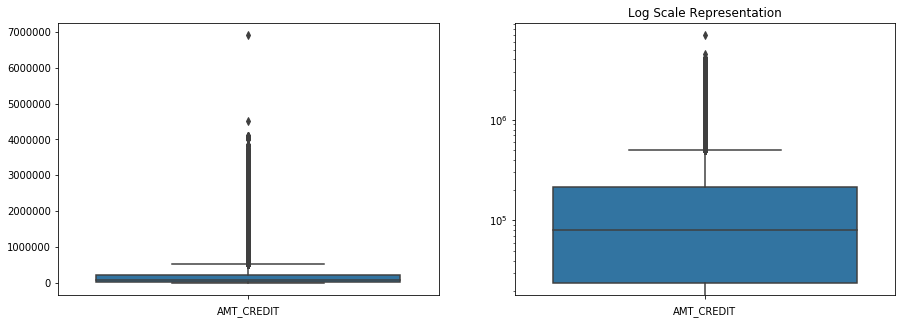

In [159]:
#Plotting boxplot to see outliers
#From boxplot it is clear that there are significant number of outliers present in the data
uniboxplot(preapp.loc[:,["AMT_CREDIT"]])

The above description show presence of outliers which means we cannot impute missing vaues with mean as mean is highly afected by outliers.We have the following options to choose from for imputing values.<ul><li>Impute the missing values with median since it is not affected by outliers</li><li>We can remove the outliers and then impute the missing values with mean</li></ul>

<h3>Note</h3>
    Based on our understanding we have selected some columns and we would be doing our analysis on those columns only. 

In [161]:
#Contains a list of columns which we deemed important
implist=['SK_ID_PREV',
'SK_ID_CURR',
'NAME_CONTRACT_TYPE',
'AMT_ANNUITY',
'AMT_APPLICATION',
'AMT_CREDIT',
'WEEKDAY_APPR_PROCESS_START',
'HOUR_APPR_PROCESS_START',
'FLAG_LAST_APPL_PER_CONTRACT',
#'NAME_CASH_LOAN_PURPOSE',
'NAME_CONTRACT_STATUS',
#'NAME_PAYMENT_TYPE',
'CODE_REJECT_REASON',
'NAME_CLIENT_TYPE',
#'NAME_PORTFOLIO',
'NAME_PRODUCT_TYPE',
'CHANNEL_TYPE',
'NAME_YIELD_GROUP',
#'PRODUCT_COMBINATION',
'DAYS_FIRST_DUE',
'DAYS_LAST_DUE_1ST_VERSION',
'DAYS_LAST_DUE',
'DAYS_TERMINATION',
'NFLAG_INSURED_ON_APPROVAL']

In [162]:
#Copying only required columns in a dataframe
df=preapp.loc[:,implist]
df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_YIELD_GROUP,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,SATURDAY,15,Y,Approved,XAP,Repeater,XNA,Country-wide,middle,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,THURSDAY,11,Y,Approved,XAP,Repeater,x-sell,Contact center,low_action,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,TUESDAY,11,Y,Approved,XAP,Repeater,x-sell,Credit and cash offices,high,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,MONDAY,7,Y,Approved,XAP,Repeater,x-sell,Credit and cash offices,middle,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,THURSDAY,9,Y,Refused,HC,Repeater,walk-in,Credit and cash offices,high,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,SATURDAY,8,Y,Approved,XAP,Repeater,x-sell,Credit and cash offices,low_normal,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,TUESDAY,11,Y,Canceled,XAP,Repeater,XNA,Credit and cash offices,XNA,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,MONDAY,7,Y,Canceled,XAP,Repeater,XNA,Credit and cash offices,XNA,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,MONDAY,15,Y,Canceled,XAP,Repeater,XNA,Credit and cash offices,XNA,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,SATURDAY,15,Y,Canceled,XAP,Repeater,XNA,Credit and cash offices,XNA,NaN,NaN,NaN,NaN,NaN


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 20 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NAME_CONTRACT_STATUS           1670214 non-null object
CODE_REJECT_REASON             1670214 non-null object
NAME_CLIENT_TYPE               1670214 non-null object
NAME_PRODUCT_TYPE              1670214 non-null object
CHANNEL_TYPE                   1670214 non-null object
NAME_YIELD_GROUP               1670214 non-null object
DAYS_FIRST_DUE                 997149 non-null float64
DAYS_LA

We carefully observed Data types of all the columns and we came to following conclusions
<ol><li>There are columns like CODE_GENDER,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON which are of type string we think they will better serve as categorical columns.Since they can be regarded categories on which we can classiy our data  </li>
<li>The column SK_ID_CURRENT,SK_ID_PREV is of int type which doesn't make any sense.It is true that it contains only numerical columns but we cannot perform any numerical operation on them so we are converting its data type to string </li><li>Columns like WEEKDAY_APPR_PROCESS_START and HOUR_APPR_PROCESS_START are of type string,int but they should be of type ordered categorical. </li><li>We also say that the flag variables like FLAG_LAST_APPL_PER_CONTRACT are of type string because they contain values Y,N but just for our comfort and ease in analysis we have changed their data type to int.Y is converted to 1 whereas N is converted 0</li></ol>

Making changes as mentioned above

In [164]:
#List of columns to convert to category type unordered
coltoconvert=[
"NAME_CONTRACT_TYPE",
"NAME_CONTRACT_STATUS",
"CODE_REJECT_REASON",
"NAME_CLIENT_TYPE",
"NAME_PRODUCT_TYPE",
"CHANNEL_TYPE",
"NAME_YIELD_GROUP"]
df.loc[:,coltoconvert]=df.loc[:,coltoconvert].astype('category')
#Converting data type of SK_ID_CURR to string
df.loc[:,"SK_ID_PREV"]=df.loc[:,"SK_ID_PREV"].astype("str")
df.loc[:,"SK_ID_CURR"]=df.loc[:,"SK_ID_CURR"].astype("str")

In [165]:
#changing data type to ordered category since that makes more sense than keeping it a int type
df["HOUR_APPR_PROCESS_START"]=df["HOUR_APPR_PROCESS_START"].astype('category',ordered=True) 
df["WEEKDAY_APPR_PROCESS_START"]=df["WEEKDAY_APPR_PROCESS_START"].astype('category',ordered=True) 

In [166]:
#Changing data type of flag variables
df.loc[:,"FLAG_LAST_APPL_PER_CONTRACT"]=df.loc[:,"FLAG_LAST_APPL_PER_CONTRACT"].apply(lambda x: 1 if x=="Y"  else  0)

In [167]:
#Analysing dataframe after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 20 columns):
SK_ID_PREV                     1670214 non-null object
SK_ID_CURR                     1670214 non-null object
NAME_CONTRACT_TYPE             1670214 non-null category
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null category
HOUR_APPR_PROCESS_START        1670214 non-null category
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null int64
NAME_CONTRACT_STATUS           1670214 non-null category
CODE_REJECT_REASON             1670214 non-null category
NAME_CLIENT_TYPE               1670214 non-null category
NAME_PRODUCT_TYPE              1670214 non-null category
CHANNEL_TYPE                   1670214 non-null category
NAME_YIELD_GROUP               1670214 non-null category
DAYS_FIRST_DUE                 997149 non-

<h3>Treating Numerical columns</h3>.
Now we will check data quality of the numerical columns in our data set.It will contain  the following things <ul><li>Check data distribution of the column</li><li>Identify the outliers.</li></ul>

<h2>How we discovered outliers ?</h2>

<ol><li>We first used a box plot to check the presence of outliers in our data.</li><li>To find exact values we used interquartile distance method. </li><li>We first calculated interquartile distance which is given as difference of 75 and 25 percentile.</li><li>Once we calculated the IQD we used it to calculate a upper and lower bound.<ul><li>Upperbound=q3+1.5*IQD</li><li>Lowerbound=q1-1.5*IQD</li></ul></li><li>Any value that does not lie in range [Lowerbound,Upperbound] is considered an outlier.</li></ol>

<b>Checking Column AMT_ANNUITY

In [168]:
#Large Difference between mean value and median value indicates presence of outliers
df.loc[:,["AMT_ANNUITY"]].describe()

,AMT_ANNUITY
count,1.297979e+06
mean,1.595512e+04
std,1.478214e+04
min,0.000000e+00
25%,6.321780e+03
50%,1.125000e+04
75%,2.065842e+04
max,4.180581e+05


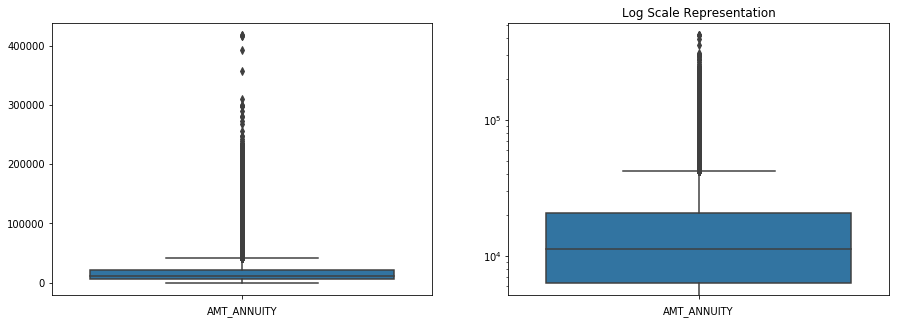

In [169]:
#Plotting boxplots to check presence of outliers
#It can be clearly seen from box plot that the variable has very high number of outliers
uniboxplot(df.loc[:,["AMT_ANNUITY"]])

In [170]:
#Calling helper function to identify outliers
checkoutliers(df,"AMT_ANNUITY")

[131249.745,
 131276.34,
 131280.705,
 131348.25,
 131517.0,
 131647.5,
 131665.635,
 393868.665,
 131755.14,
 131762.16,
 131796.135,
 131892.66,
 131904.9,
 131920.155,
 131955.39,
 132035.4,
 132176.88,
 132345.36,
 132349.77,
 132671.655,
 132846.12,
 132853.5,
 132861.51,
 132898.86,
 132937.02,
 132984.0,
 132988.5,
 132992.01,
 133048.53,
 133353.405,
 133602.165,
 133732.665,
 52643.16,
 133796.655,
 133830.45,
 133927.155,
 134034.75,
 134131.005,
 134217.27,
 52743.96,
 52749.81,
 134332.02,
 52757.19,
 134385.39,
 134409.24,
 134462.52,
 134727.48,
 134885.16,
 134892.0,
 134897.4,
 134900.28,
 135000.0,
 135043.605,
 135090.765,
 52909.875,
 135133.965,
 135152.55,
 135221.265,
 135221.985,
 135233.955,
 135336.24,
 135466.74,
 135571.275,
 135583.605,
 135597.33,
 135603.09,
 135755.19,
 136274.04,
 136472.535,
 136498.95,
 136788.39,
 136805.76,
 268155.225,
 137155.275,
 137160.0,
 137334.87,
 137606.85,
 137737.35,
 137741.895,
 137771.37,
 137790.045,
 137915.955,
 138

In [171]:
#Treating outliers
df["AMT_ANNUITY"]=treatoutlier(df,"AMT_ANNUITY")

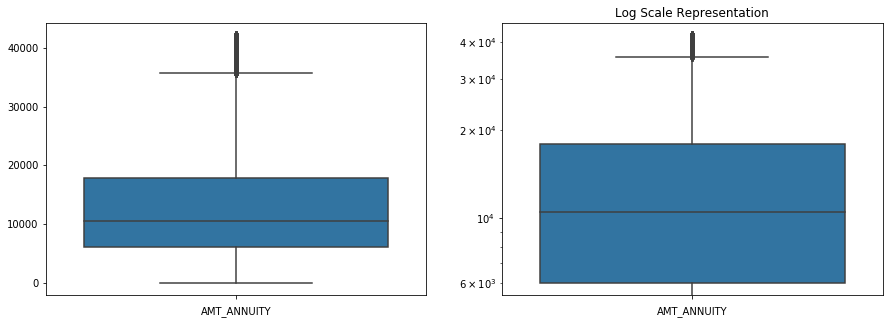

In [172]:
#Boxplot after treating outliers
uniboxplot(df.loc[:,["AMT_ANNUITY"]])

In [173]:
df.loc[:,["AMT_ANNUITY"]].describe()

,AMT_ANNUITY
count,1.215217e+06
mean,1.312959e+04
std,9.240516e+03
min,0.000000e+00
25%,6.024600e+03
50%,1.052928e+04
75%,1.790154e+04
max,4.216100e+04


<h3>Insights</h3>
<ol><li>The outliers have been treated but still there are some outliers present.This suggest we need to fine tune our outlier detection method.</li><li>The boxplot shows that most of the data is concentrated between 6,000-18,000</li><li>Minimum value of AMT_ANNUITY is 0 wheraeas maximum value is 42161</li><li>The thickness of the boxplot suggest that data distribution is not very wide i.e data is not spread over a large range.</li></ol>

<b>Checking Column AMT_APPLICATION

In [174]:
#Large Difference between mean value and median value indicates presence of outliers
df.loc[:,["AMT_APPLICATION"]].describe()

,AMT_APPLICATION
count,1.670214e+06
mean,1.752339e+05
std,2.927798e+05
min,0.000000e+00
25%,1.872000e+04
50%,7.104600e+04
75%,1.803600e+05
max,6.905160e+06


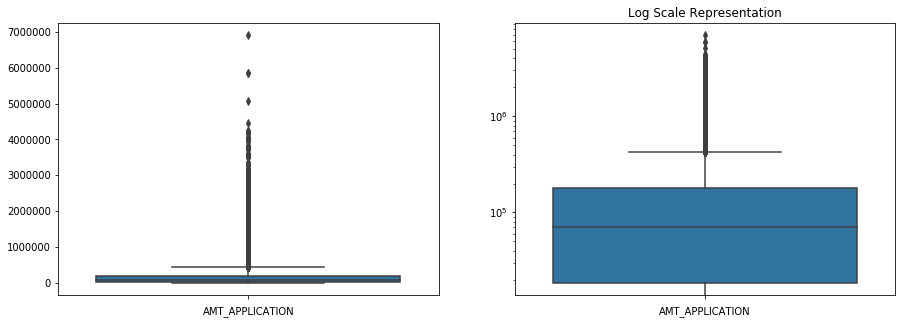

In [175]:
#Plotting boxplots to check presence of outliers
#It can be clearly seen from box plot that the variable has very high number of outliers
uniboxplot(df.loc[:,["AMT_APPLICATION"]])

In [176]:
#Calling helper function to identify outliers
checkoutliers(df,"AMT_APPLICATION")

[622599.435,
 557073.0,
 557086.5,
 688158.0,
 557089.38,
 557100.0,
 1278000.0,
 1409077.485,
 458805.195,
 753719.04,
 491583.6,
 524353.5,
 589891.5,
 458820.0,
 426055.5,
 786510.0,
 753750.0,
 524380.5,
 426122.235,
 524434.5,
 491670.0,
 426136.5,
 622755.0,
 426150.0,
 786600.0,
 688297.5,
 1507500.0,
 884910.465,
 524466.0,
 1474739.415,
 524475.0,
 655551.0,
 426177.0,
 950472.0,
 458955.0,
 655564.5,
 622800.0,
 458964.0,
 524502.0,
 491752.935,
 458991.0,
 491760.0,
 1278197.01,
 459000.0,
 426240.0,
 459013.5,
 1081606.5,
 491782.5,
 688392.045,
 426249.0,
 1016087.04,
 590103.495,
 688410.0,
 655650.0,
 459045.0,
 1737000.0,
 557352.0,
 524587.5,
 426285.0,
 819508.5,
 426294.0,
 426307.5,
 426312.0,
 491850.0,
 426316.5,
 459094.5,
 3015000.0,
 786780.0,
 622944.0,
 524646.0,
 459117.0,
 688500.0,
 983416.5,
 655744.5,
 1147266.0,
 426375.0,
 491913.0,
 557460.0,
 459162.0,
 688543.155,
 1966500.0,
 852390.0,
 491944.5,
 1016235.0,
 1016244.0,
 426420.0,
 754101.0,
 55750

In [177]:
#Treating outliers
df["AMT_APPLICATION"]=treatoutlier(df,"AMT_APPLICATION")

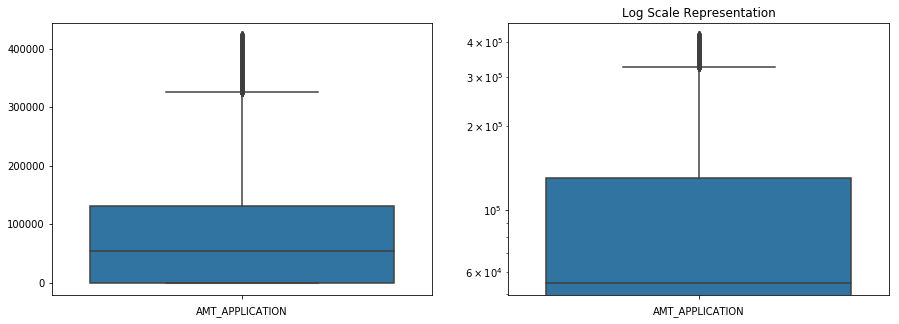

In [178]:
#Boxplot after treating outliers
uniboxplot(df.loc[:,["AMT_APPLICATION"]])

In [179]:
df.loc[:,["AMT_APPLICATION"]].describe()

,AMT_APPLICATION
count,1.462195e+06
mean,8.464202e+04
std,9.166230e+04
min,0.000000e+00
25%,0.000000e+00
50%,5.481000e+04
75%,1.305000e+05
max,4.228200e+05


<h3>Insights</h3>
<ol><li>The outliers have been treated but still there are some outliers present.This suggest we need to fine tune our outlier detection method.</li><li>The boxplot shows that most of the data is concentrated between 0-1,20,000</li><li>Minimum value of AMT_APPLICATION is 0 wheraeas maximum value is 422820</li><li>The thickness of the boxplot suggest that data distribution is not very wide i.e data is not spread over a large range.</li></ol>

<b>Checking Column AMT_CREDIT

In [180]:
#Large Difference between mean value and median value indicates presence of outliers
df.loc[:,["AMT_CREDIT"]].describe()

,AMT_CREDIT
count,1.670213e+06
mean,1.961140e+05
std,3.185746e+05
min,0.000000e+00
25%,2.416050e+04
50%,8.054100e+04
75%,2.164185e+05
max,6.905160e+06


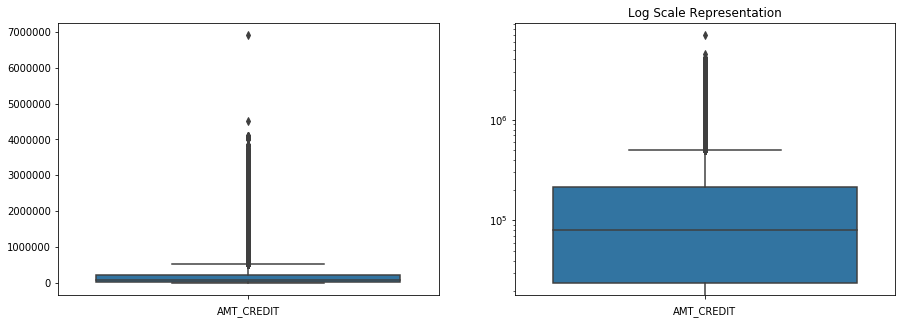

In [181]:
#Plotting boxplots to check presence of outliers
#It can be clearly seen from box plot that the variable has very high number of outliers
uniboxplot(df.loc[:,["AMT_CREDIT"]])

In [182]:
#Calling helper function to identify outliers
checkoutliers(df,"AMT_CREDIT")

[622593.0,
 2392065.0,
 884740.5,
 1212426.0,
 524299.5,
 557073.0,
 2097171.0,
 589846.5,
 786456.0,
 524313.0,
 688158.0,
 655393.5,
 589859.46,
 524327.49,
 1671210.0,
 524335.5,
 1278000.0,
 1114159.5,
 1114164.0,
 753718.5,
 622647.0,
 884794.5,
 1867837.5,
 1376320.5,
 1966144.5,
 557127.0,
 589896.0,
 786505.5,
 753741.0,
 1671250.5,
 655447.5,
 1278045.0,
 917599.5,
 786528.0,
 1474659.0,
 2064487.5,
 884844.0,
 1343601.0,
 524403.0,
 557176.5,
 2359417.5,
 852088.5,
 983160.0,
 753801.75,
 1802385.0,
 1867927.5,
 852120.0,
 655515.0,
 589981.5,
 1540255.5,
 1048738.5,
 786600.0,
 557226.0,
 884907.0,
 1507500.0,
 786604.5,
 753840.0,
 524466.0,
 557235.0,
 688311.0,
 524475.0,
 1245375.0,
 557248.5,
 655551.0,
 1343682.0,
 1114308.0,
 1212615.0,
 2490570.0,
 655564.5,
 524493.0,
 557262.0,
 852174.405,
 622800.0,
 688338.0,
 1310931.0,
 524502.0,
 1310940.0,
 1343709.0,
 852192.0,
 786663.0,
 819432.0,
 1736937.0,
 1016039.925,
 688365.0,
 1343727.0,
 786672.0,
 819445.5,
 524

In [183]:
#Treating outliers
df["AMT_CREDIT"]=treatoutlier(df,"AMT_CREDIT")

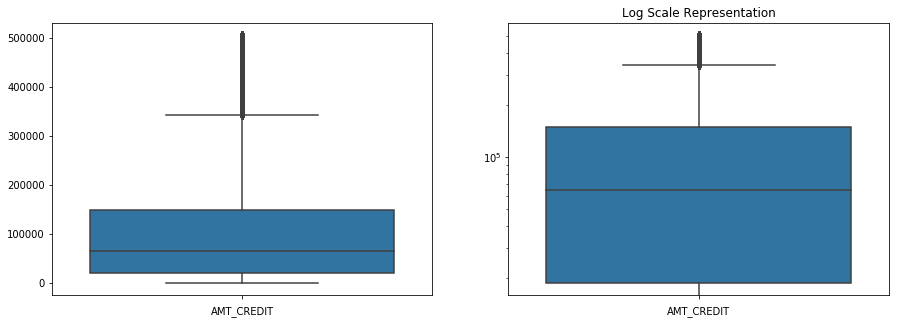

In [184]:
#Boxplot after treating outliers
uniboxplot(df.loc[:,["AMT_CREDIT"]])

In [185]:
df.loc[:,["AMT_CREDIT"]].describe()

,AMT_CREDIT
count,1.490224e+06
mean,1.043948e+05
std,1.167150e+05
min,0.000000e+00
25%,1.885500e+04
50%,6.473925e+04
75%,1.483650e+05
max,5.048055e+05


<h3>Insights</h3>
<ol><li>The outliers have been treated but still there are some outliers present.This suggest we need to fine tune our outlier detection method.</li><li>The boxplot shows that most of the data is concentrated between 0-1,20,000</li><li>Minimum value of AMT_CREDIT is 0 wheraeas maximum value is 504805.</li><li>The thickness of the boxplot suggest that data distribution is not very wide i.e data is not spread over a large range.</li></ol>

<h2>Approach</h2>
<ul><li>We will now divide the dataframe df into four data frames Approved,Canceled,Refused and Unused Offer.</li><li>These four data frames will contain data of Approved,Canceled,Refused and Unused Offer respectively</li><li>Using these dataframes we will now try to see if there are any patterns between different variables and their effect on loan getting approved.</li><li>We will see which group of people are getting loans approved and which characteristics can say that person is likely to get loan approved</li></ul>

In [186]:
#Creating data frame for Loan approved
#Target 1 says client has payment difficulties
dfapproved=df.loc[df.NAME_CONTRACT_STATUS=='Approved']
dfapproved.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_YIELD_GROUP,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,SATURDAY,15,1,Approved,XAP,Repeater,XNA,Country-wide,middle,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,NaN,NaN,THURSDAY,11,1,Approved,XAP,Repeater,x-sell,Contact center,low_action,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,TUESDAY,11,1,Approved,XAP,Repeater,x-sell,Credit and cash offices,high,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,NaN,NaN,470790.0,MONDAY,7,1,Approved,XAP,Repeater,x-sell,Credit and cash offices,middle,-482.0,-152.0,-182.0,-177.0,1.0
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,SATURDAY,8,1,Approved,XAP,Repeater,x-sell,Credit and cash offices,low_normal,-654.0,-144.0,-144.0,-137.0,1.0


In [187]:
#Creating data frame for Loan refused
#Target 1 says client has payment difficulties
dfrefused=df.loc[df.NAME_CONTRACT_STATUS=='Refused']
dfrefused.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_YIELD_GROUP,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,THURSDAY,9,1,Refused,HC,Repeater,walk-in,Credit and cash offices,high,NaN,NaN,NaN,NaN,NaN
19,1173070,199178,Cash loans,4666.500,45000.0,49455.0,SATURDAY,16,1,Refused,HC,Repeater,walk-in,AP+ (Cash loan),high,NaN,NaN,NaN,NaN,NaN
20,1506815,166490,Cash loans,25454.025,NaN,491580.0,MONDAY,6,1,Refused,HC,Repeater,x-sell,Credit and cash offices,low_normal,NaN,NaN,NaN,NaN,NaN
22,1172842,302212,Cash loans,NaN,0.0,0.0,TUESDAY,9,1,Refused,HC,Repeater,XNA,Credit and cash offices,XNA,NaN,NaN,NaN,NaN,NaN
23,1172937,302212,Cash loans,39475.305,NaN,NaN,THURSDAY,5,1,Refused,HC,Repeater,x-sell,Credit and cash offices,low_normal,NaN,NaN,NaN,NaN,NaN


In [188]:
#Creating data frame for Loan canceled
#Target 1 says client has payment difficulties
dfcanceled=df.loc[df.NAME_CONTRACT_STATUS=='Canceled']
dfcanceled.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_YIELD_GROUP,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
6,2315218,175704,Cash loans,NaN,0.0,0.0,TUESDAY,11,1,Canceled,XAP,Repeater,XNA,Credit and cash offices,XNA,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,MONDAY,7,1,Canceled,XAP,Repeater,XNA,Credit and cash offices,XNA,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,MONDAY,15,1,Canceled,XAP,Repeater,XNA,Credit and cash offices,XNA,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,SATURDAY,15,1,Canceled,XAP,Repeater,XNA,Credit and cash offices,XNA,NaN,NaN,NaN,NaN,NaN
24,1555330,199353,Cash loans,NaN,0.0,0.0,SATURDAY,6,1,Canceled,XAP,Repeater,XNA,Credit and cash offices,XNA,NaN,NaN,NaN,NaN,NaN


In [189]:
#Creating data frame for Loan unused offer
#Target 1 says client has payment difficulties
dfunused=df.loc[df.NAME_CONTRACT_STATUS=='Unused offer']
dfunused.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_YIELD_GROUP,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
41,1366380,247572,Consumer loans,NaN,17950.5,17950.5,MONDAY,19,1,Unused offer,CLIENT,Repeater,XNA,Country-wide,XNA,NaN,NaN,NaN,NaN,NaN
97,1935914,191576,Consumer loans,NaN,23400.0,23400.0,SATURDAY,9,1,Unused offer,CLIENT,Repeater,XNA,Country-wide,XNA,NaN,NaN,NaN,NaN,NaN
98,1457539,307992,Consumer loans,NaN,113215.5,113215.5,SUNDAY,12,1,Unused offer,CLIENT,New,XNA,Country-wide,XNA,NaN,NaN,NaN,NaN,NaN
152,1763186,393157,Consumer loans,NaN,62860.5,62860.5,FRIDAY,15,1,Unused offer,CLIENT,Repeater,XNA,Country-wide,XNA,NaN,NaN,NaN,NaN,NaN
182,2284847,454600,Consumer loans,NaN,27666.0,27666.0,THURSDAY,16,1,Unused offer,CLIENT,Repeater,XNA,Country-wide,XNA,NaN,NaN,NaN,NaN,NaN


<h3>Univariate Analysis on Numerical Columns

<b>Univariate Analysis on column AMT_CREDIT

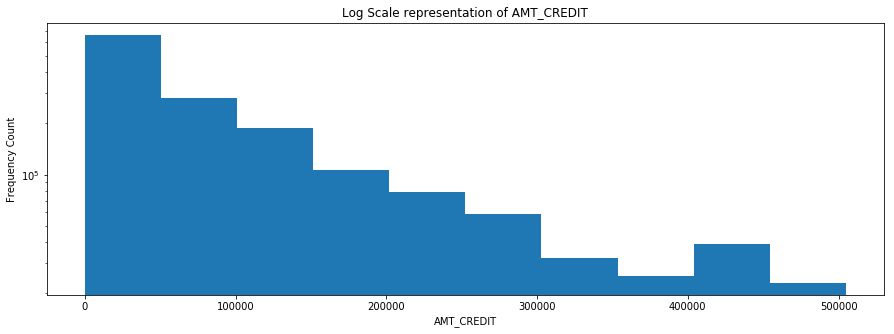

In [190]:
#Plotting chart to see data distribution
plt.figure(figsize=(15,5))
#plotting histogram
plt.hist(df.loc[:,"AMT_CREDIT"].dropna())
#Setting x,y labels and Title
plt.xlabel("AMT_CREDIT")
plt.ylabel("Frequency Count")
plt.title("Log Scale representation of AMT_CREDIT")
#Setting yscale to log
plt.yscale("log")

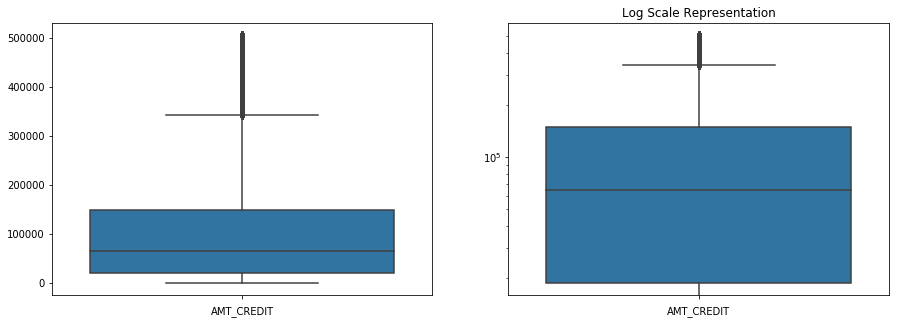

In [191]:
#plotting Box plot
uniboxplot(df.loc[:,["AMT_CREDIT"]])

In [192]:
#peek at data
df.loc[:,"AMT_CREDIT"].describe()

count    1.490224e+06
mean     1.043948e+05
std      1.167150e+05
min      0.000000e+00
25%      1.885500e+04
50%      6.473925e+04
75%      1.483650e+05
max      5.048055e+05
Name: AMT_CREDIT, dtype: float64

<h3>Insights</h3>
<ul>
    <li>The bar plot suggest that AMT_CREDIT follow power law </li>
    <li>Minimum value is 0 and maximum value is 5048055. We can also estimate these values from the boxplot shown above.</li><li>Box plot suggest that most of the values of AMT_CREDIT are concentrated between 20,000 and 1,60,000</li><li>Frequency of AMT_CREDIT between 0-50,000 is highest</li>
    </ul>

<b>Univariate Analysis on column AMT_ANNUITY

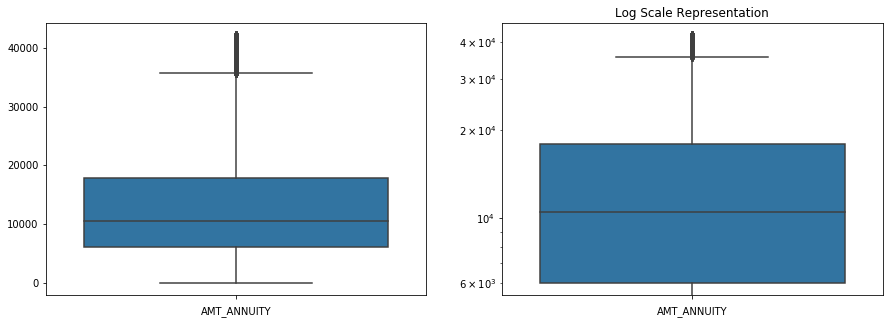

In [193]:
#Checking data distribution and outliers
uniboxplot(df.loc[:,["AMT_ANNUITY"]])

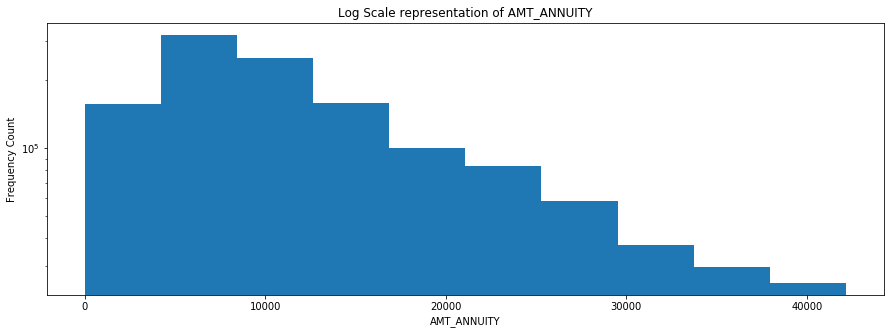

In [194]:
#plotting chart to see data distribtuion
#Setting figure size
plt.figure(figsize=(15,5))
#plotting histrogram
plt.hist(df.loc[:,"AMT_ANNUITY"].dropna())
#Setting xlabel ,ylabel and title
plt.xlabel("AMT_ANNUITY")
plt.ylabel("Frequency Count")
plt.title("Log Scale representation of AMT_ANNUITY")
#Setting yscale to log
plt.yscale("log")

In [195]:
#Peek at data description
df.loc[:,"AMT_ANNUITY"].describe()

count    1.215217e+06
mean     1.312959e+04
std      9.240516e+03
min      0.000000e+00
25%      6.024600e+03
50%      1.052928e+04
75%      1.790154e+04
max      4.216100e+04
Name: AMT_ANNUITY, dtype: float64

<h3>Insights</h3>
<ul>
    <li>The bar plot suggest that AMT_ANNUITY follow power law after 5,000.This suggest frequency distribution after 5,000 follows a geometric progression.</li>
    <li>Minimum value is 0 and maximum value is 42,161. We can also estimate these values from the boxplot shown above.</li><li>Box plot suggest that most of the values of AMT_ANNUITY are concentrated between 5,000 and 18,000</li>
    </ul>

<b>Univariate Analysis on column AMT_APPLICATION

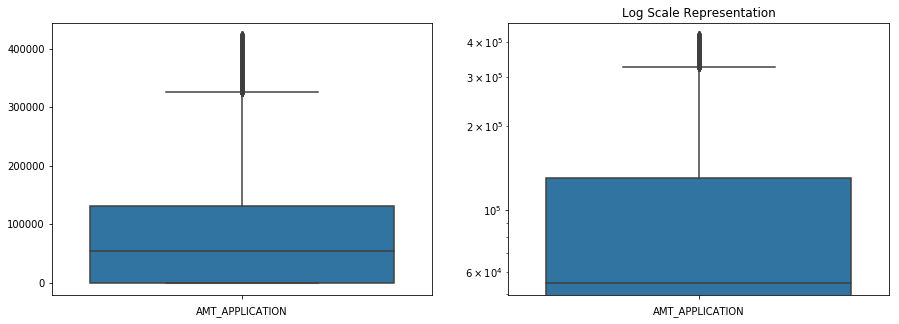

In [196]:
#Checking data distribution and outliers
uniboxplot(df.loc[:,["AMT_APPLICATION"]])

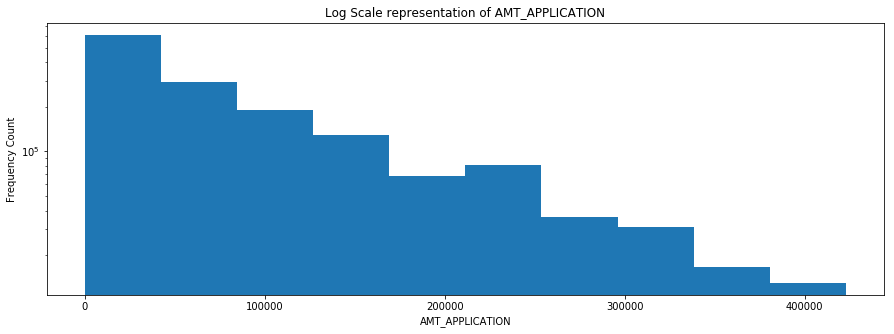

In [197]:
#Plotting data to see its distribution
#setting figure size
plt.figure(figsize=(15,5))
plt.hist(df.loc[:,"AMT_APPLICATION"].dropna())
#Setting xlabel,ylabel,Title
plt.xlabel("AMT_APPLICATION")
plt.ylabel("Frequency Count")
plt.title("Log Scale representation of AMT_APPLICATION")
#Setting y scale to log
plt.yscale("log")

In [198]:
df.loc[:,"AMT_APPLICATION"].describe()

count    1.462195e+06
mean     8.464202e+04
std      9.166230e+04
min      0.000000e+00
25%      0.000000e+00
50%      5.481000e+04
75%      1.305000e+05
max      4.228200e+05
Name: AMT_APPLICATION, dtype: float64

<h3>Insights</h3>
<ul>
    <li>The AMT_APPLICATION follows poer law as is evident from bar chart.</li>
    <li>Minimum value is 0 and maximum value is 4,22,820. We can also estimate these values from the boxplot shown above.</li><li>Box plot suggest that most of the values of AMT_APPLICATION are concentrated between 0 and 1,20,000</li>
    </ul>

<h3>Univariate Analysis on Categorical Columns

<b>Analysing Column NAME_CONTRACT_TYPE

In [199]:
#Seeing value count of categorical column
df['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

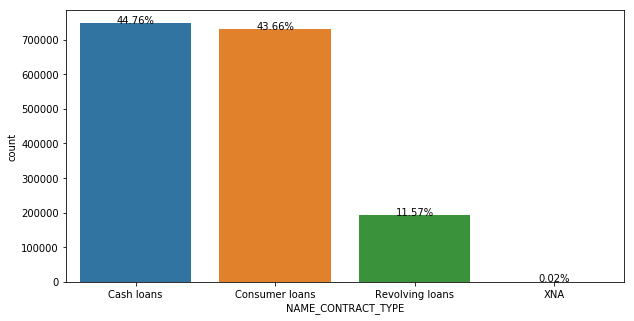

In [200]:
#Plotting Count plot
unicountplot(df.loc[:,"NAME_CONTRACT_TYPE"])

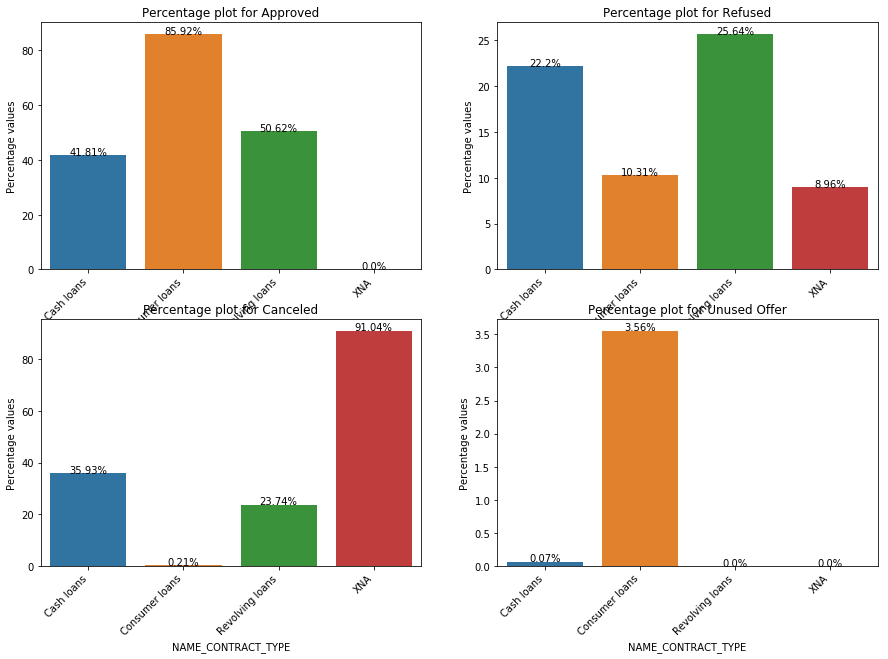

In [201]:
#Analysis of NAME_CONTRACT_TYPE after dividing it in 4 groups.
catanalysis(df,"NAME_CONTRACT_TYPE",rot=1)

<h3>Observations</h3>
<ol><li>85.92% of Consumer loans are approved.</li><li>25.64% of Revolving loans are refused.</li><li>91.04% of XNA are canceled.<li>3.56% of consumer loans are unused offer.</ol>

<h3>Conclusion</h3>
<ol><li>85% of the consumer loans get approved.This means that if a customer apply for a consumer loan then it has very high chance of getting approved.</li><li>Almost 25% Revolving loans and 22% of cash loans are refused  by the bank</li><li>Cash loans are more canceled by client than revolving loans.</li><li>Percentage of unused offers is very low for each category but Consumer loan offers are loans which are unused the most.</li></ol>

<b>Analysing Column NAME_CLIENT_TYPE

In [202]:
#Seeing Value Count of categorical variables 
df['NAME_CLIENT_TYPE'].value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

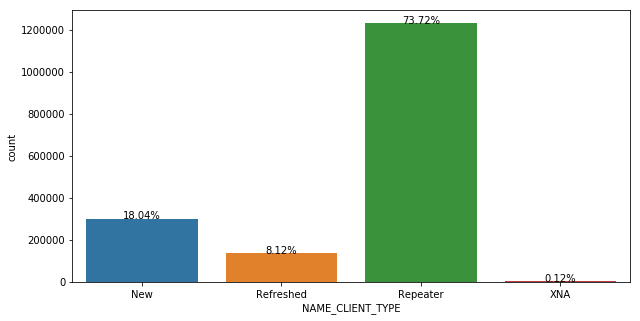

In [203]:
#Plotting count plot
unicountplot(df.loc[:,"NAME_CLIENT_TYPE"])

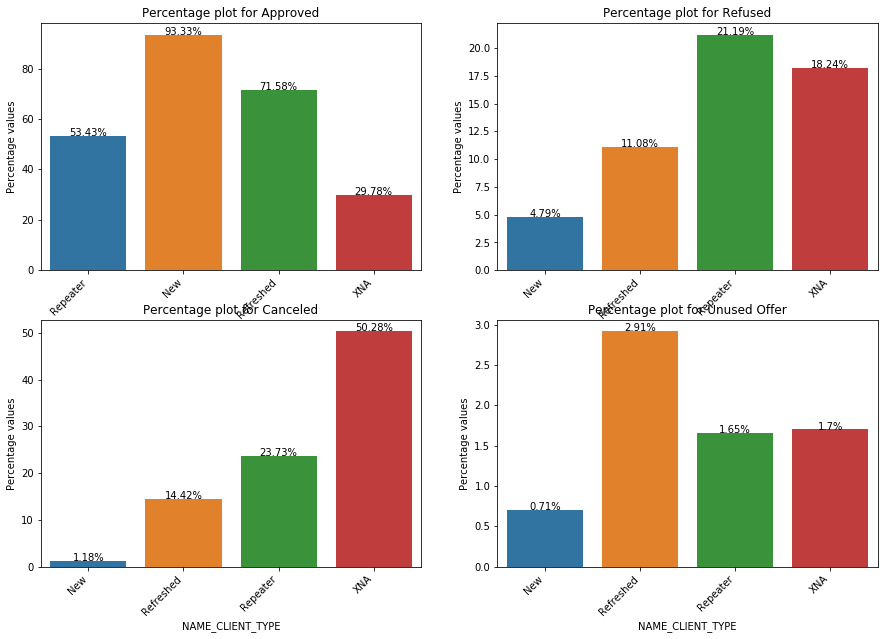

In [204]:
#Categorical analysis of NAME_CLIENT_TYPE after dividing into 4 groups
catanalysis(df,"NAME_CLIENT_TYPE",rot=1)

<h3>Observations</h3>
<ol><li>93.33% of loans applied by New client  are approved whereas only 72% of refreshed client loans are approved.THe number is worse for repeater clients.</li><li>REpeater clients loans are refused the most.21.19% loans applied by Repeater clients loans are refused.NEw clients loans are refused the least only 5%</li><li>Repeater clients often cancel their loan at some stage.Almost 24% of them canceled the procedure.NEw clients rarely cancel the loan.Only 1% for new clients canceled their loans.</li><li>Very rarely client loans are unused.The percentage is highest for refreshed clients but still the number is not very significant(only 3%)</li></ol>

<h3>Conclusion</h3>
<ol><li>New clients have very high chance around 93% of their loans getting approved.</li><li>Repeater client has less chances aroung 50% of loan getting approved .</li><li>Only 5% of the new clients loan request are refused whereas the number is around 22% for repeater client.</li><li>Although repeater clients loans are less approved still around 24% of them canceled their loan at some point. </li><li>Refreshed clients loans are more likely to be unused then any other type client</li></ol>

<b>Analysing Column WEEKDAY_APPR_PROCESS_START

In [205]:
#Checking value count
df['WEEKDAY_APPR_PROCESS_START'].value_counts()

TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

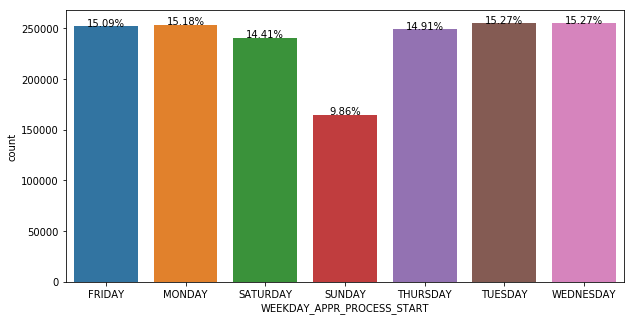

In [206]:
#plotting count plot
unicountplot(df.loc[:,"WEEKDAY_APPR_PROCESS_START"])

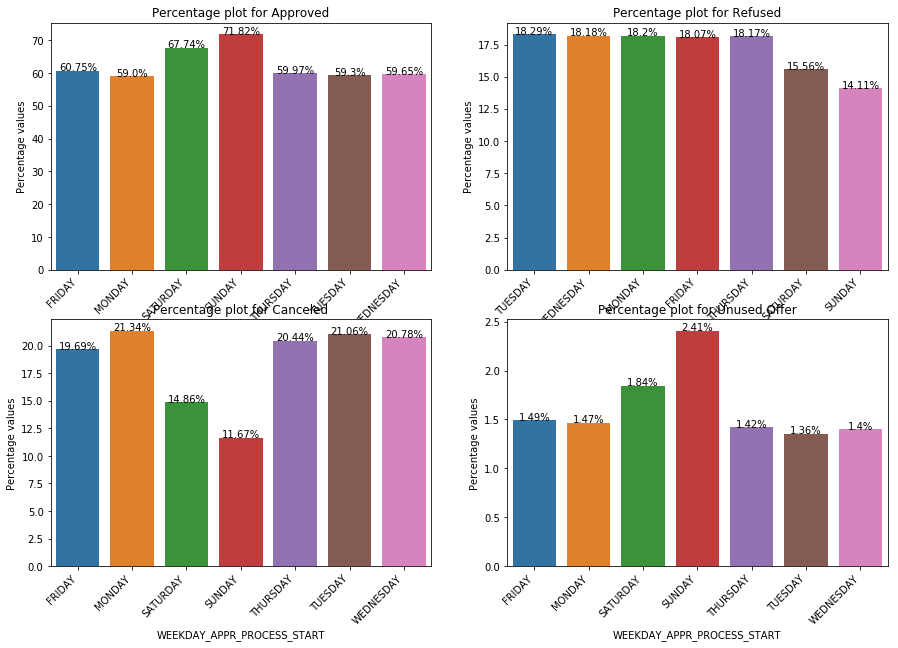

In [207]:
#CAtegorical Analysis on column
catanalysis(df,"WEEKDAY_APPR_PROCESS_START",rot=1)

<h3>Observations</h3>
<ol><li>71.82% of loans applied on sunday are approved.</li><li>18.29% of loans applied on Tuesday are refused.</li><li>21.34% of loans applied on Monday are canceled.<li>2.41% of loans applied on Sunday are unused offer.</ol>

<h3>Conclusion</h3>
<ol><li>Loans which are applied on weekends(Saturday and Sunday) are approved more.Around 72% of them get approved.</li><li>If a client has applied for a loan on weekdays there is a 18% chance that it is refused by the bank.</li><li>Similar trend is observed for cancelled.There is around 20% chance that clients who applied for loans on weekdays will cancel it at some point. </li><li>Around 2% of loans which are approved by bank on weekends are unused by client.The percentage is 1.5% for loans which were applied on weekdays.</li></ol>

<h2>Bivariate Analysis(Categorical Columns)

Till now we have made some conclusions considering a single categorical variable and comparing it with respect to NAME_CONTRACT_STATUS variable.Now we will take it a step further and see how combination of two categorical variables affect the NAME_CONTRACT_STATUS variables.We will draw inferences taking two cases.

<b>Example 1: Columns involved NAME_CONTRACT_TYPE,NAME_CLIENT_TYPE</b>
<ul><li>For NAME_CLIENT_TYPE we observed that there is high chance of new client loan getting approved.</li><li>For NAME_CONTRACT_TYPE we observed that there is high chance of consumer loan getting approved.<li>We will now see if we observe the similar trend when we divide data based on client type.</li>

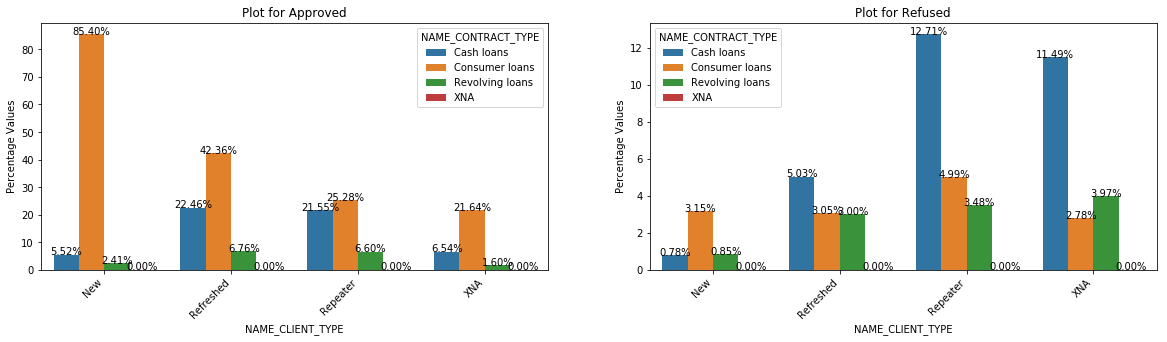

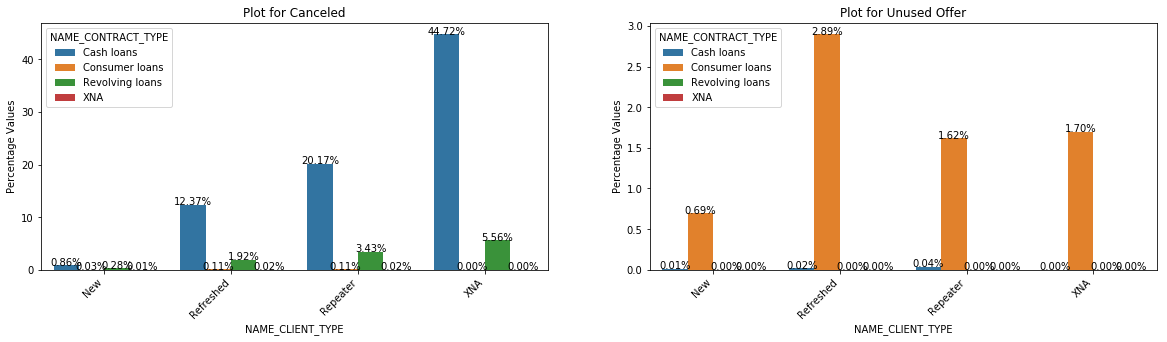

In [208]:
#Plotiing charts for bvariate analysis
#Setting figure size
plt.figure(figsize=(20,10))
#plotting plot for approved loans
plt.subplot(2,2,1)
bicatanalysis(dfapproved,"NAME_CLIENT_TYPE","NAME_CONTRACT_TYPE","Approved")
plt.subplot(2,2,2)
bicatanalysis(dfrefused,"NAME_CLIENT_TYPE","NAME_CONTRACT_TYPE","Refused")
plt.figure(figsize=(20,10))
#plotting plot for canceled loans
plt.subplot(2,2,3)
bicatanalysis(dfcanceled,"NAME_CLIENT_TYPE","NAME_CONTRACT_TYPE","Canceled")
#plotting plot for unused loans
plt.subplot(2,2,4)
bicatanalysis(dfunused,"NAME_CLIENT_TYPE","NAME_CONTRACT_TYPE","Unused Offer")

<h3>Observations and Conclusions</h3>
<ul><li>Earlier we saw that new client have more chance of getting loans approved and Consumer loans have higher chance of getting approved</li><li>92% of new clients have approved loans.85% of total new clients got approved consumer loans. </li><li>The chart still supports our understanding that client who apply for consumer loans have higher chance of getting loans approved.This is evident from the fact for different client type whose loans got approved we can observe they applied for consumer loans.<li>In each client category,loans which are approved majority of them are consumer loans.</li><li>Refreshed and repeater clients have considerable number of approved cash loans.The number is considerably higher than new clients.</li><li>CAsh loans by repeater clients are rejected the most.For new clients consumer loans are rejeceted most.</li><li>Almost 20% of repeater clients have canceled their application of cash loans.The reason cannot be understood at this point but the number suggest some investigation is in order.</li><ul>

<h2>Bivariate Analysis(Numerical Columns)

<b>Analysis on loans which are approved

In [209]:
#Seeing coerlation
df.loc[df.NAME_CONTRACT_STATUS=="Approved",["AMT_ANNUITY","AMT_CREDIT","AMT_APPLICATION"]].corr()

,AMT_ANNUITY,AMT_CREDIT,AMT_APPLICATION
AMT_ANNUITY,1.000000,0.766670,0.707257
AMT_CREDIT,0.766670,1.000000,0.828863
AMT_APPLICATION,0.707257,0.828863,1.000000


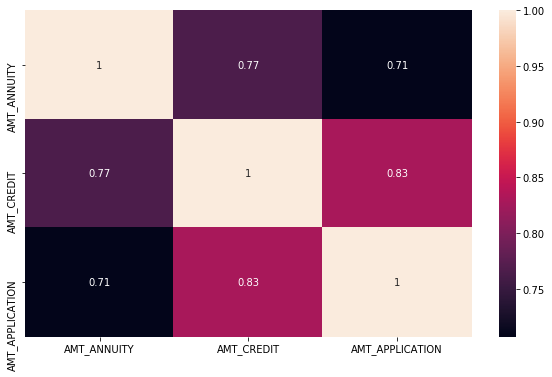

In [210]:
#Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.loc[df.NAME_CONTRACT_STATUS=="Approved",["AMT_ANNUITY","AMT_CREDIT","AMT_APPLICATION"]].corr(),annot=True)
plt.show()

<b>Insights</b>
<ul>
    <li>All the columns are highly corelated.
    </li>
    <li>Corelation of AMT_ANNUITY with AMT_Credit is .77 whereas corelation with AMT_APPLICATION is .71</li>
    <li>Corelation of AMT_APPLICATION with AMT_CREDIT is highest and is equal to .83</li>
</ul>

<b>Analysis on loans which are refused

In [211]:
#Seeing coerlation
df.loc[df.NAME_CONTRACT_STATUS=="Refused",["AMT_ANNUITY","AMT_CREDIT","AMT_APPLICATION"]].corr()

,AMT_ANNUITY,AMT_CREDIT,AMT_APPLICATION
AMT_ANNUITY,1.000000,0.727913,0.649844
AMT_CREDIT,0.727913,1.000000,0.881559
AMT_APPLICATION,0.649844,0.881559,1.000000


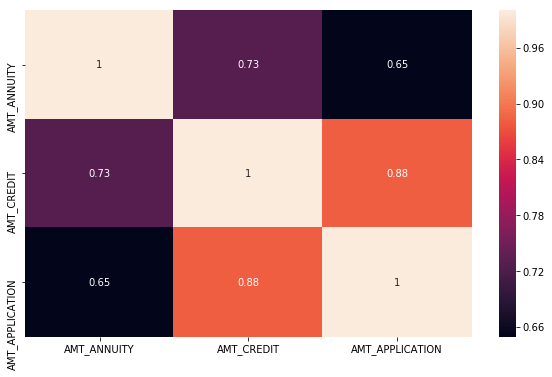

In [212]:
#Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.loc[df.NAME_CONTRACT_STATUS=="Refused",["AMT_ANNUITY","AMT_CREDIT","AMT_APPLICATION"]].corr(),annot=True)
plt.show()

<b>Insights</b>
<ul>
    <li>All the columns are highly corelated.
    </li>
    <li>Corelation of AMT_ANNUITY with AMT_Credit is .73 whereas corelation with AMT_APPLICATION is .65</li>
    <li>Corelation of AMT_APPLICATION with AMT_CREDIT is highest and is equal to .88</li>
</ul>

<b>Analysis on loans which are Canceled

In [213]:
#Seeing coerlation
df.loc[df.NAME_CONTRACT_STATUS=="Canceled",["AMT_ANNUITY","AMT_CREDIT","AMT_APPLICATION"]].corr()

,AMT_ANNUITY,AMT_CREDIT,AMT_APPLICATION
AMT_ANNUITY,1.000000,0.685390,0.596462
AMT_CREDIT,0.685390,1.000000,0.993187
AMT_APPLICATION,0.596462,0.993187,1.000000


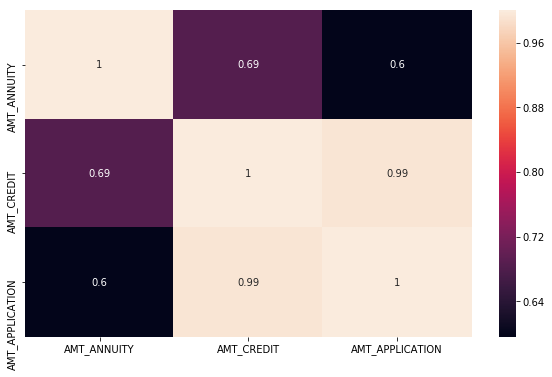

In [214]:
#Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.loc[df.NAME_CONTRACT_STATUS=="Canceled",["AMT_ANNUITY","AMT_CREDIT","AMT_APPLICATION"]].corr(),annot=True)
plt.show()

<b>Insights</b>
<ul>
    <li>All the columns are not as highly corelated as we saw in previous cases.
    </li>
    <li>Corelation of AMT_ANNUITY with AMT_Credit is .69</li><li>Corelation of AMT_ANNUITY with AMT_APPLICATION is .6</li>
    <li>Corelation of AMT_APPLICATION with AMT_CREDIT is highest and is equal to .99</li>
</ul>

<b>Analysis on loans which are Unused offer

In [215]:
#Seeing coerlation
df.loc[df.NAME_CONTRACT_STATUS=="Unused offer",["AMT_ANNUITY","AMT_CREDIT","AMT_APPLICATION"]].corr()

,AMT_ANNUITY,AMT_CREDIT,AMT_APPLICATION
AMT_ANNUITY,1.000000,0.941787,0.940359
AMT_CREDIT,0.941787,1.000000,0.999153
AMT_APPLICATION,0.940359,0.999153,1.000000


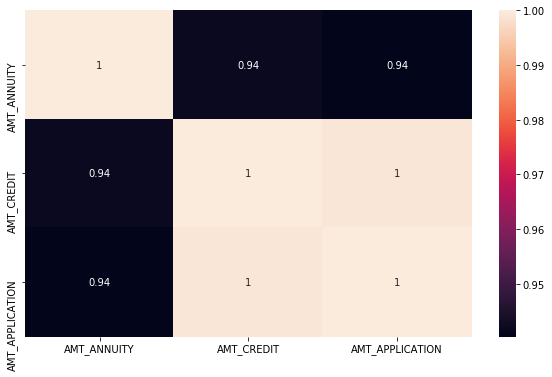

In [216]:
#Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.loc[df.NAME_CONTRACT_STATUS=="Unused offer",["AMT_ANNUITY","AMT_CREDIT","AMT_APPLICATION"]].corr(),annot=True)
plt.show()

<b>Insights</b>
<ul>
    <li>All the columns are highly corelated.
    </li>
    <li>Corelation of AMT_ANNUITY with AMT_Credit is .94</li><li>Corelation of AMT_ANNUITY with AMT_APPLICATION is .94</li>
    <li>Corelation of AMT_APPLICATION with AMT_CREDIT is highest and is equal to 1.This is somewhat unexpected result.</li>
</ul>